The final best test score is around 1.3. 

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load & split data

In [2]:
main_df = pd.read_csv('data/AB_NYC_2019.csv')

In [3]:
main_df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [72]:
from sklearn.model_selection import train_test_split

# remove records with missing values in the target column
main_df = main_df.dropna(subset=["reviews_per_month"])

train_df, test_df = train_test_split(main_df, train_size=0.7, random_state=123)
X_train = train_df.drop(columns=["reviews_per_month"])
y_train = train_df["reviews_per_month"]
X_test = test_df.drop(columns=["reviews_per_month"])
y_test = test_df["reviews_per_month"]

In [5]:
X_train.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [6]:
print(train_df.shape)
train_df

(27190, 16)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
14989,11937647,Entire Williamsburg apt.,12446288,Micki & Kristian,Brooklyn,Williamsburg,40.71541,-73.93748,Entire home/apt,110,3,4,2018-05-30,0.10,1,0
40517,31409612,Tremendous Views - Greenpoint,56061729,Dennis,Brooklyn,Greenpoint,40.73421,-73.95318,Entire home/apt,125,2,8,2019-06-10,1.37,1,188
32631,25635216,Clean and Nice Central Park Apt in Lincoln Center,193127179,Sagawa,Manhattan,Upper West Side,40.77640,-73.98236,Private room,85,4,18,2019-05-03,1.38,1,133
39464,30747515,Bedstuy-stay,20043437,Marianne,Brooklyn,Bedford-Stuyvesant,40.68581,-73.95189,Private room,35,10,3,2019-05-31,0.48,1,5
26165,20864878,High Line Sun Drenched Home,13462349,Elvis,Manhattan,Chelsea,40.74690,-73.99494,Entire home/apt,200,2,40,2019-06-19,1.81,1,288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8846,6784378,Large Room & Own Bath by train,7788268,Marites,Brooklyn,Prospect-Lefferts Gardens,40.65894,-73.95947,Private room,75,2,10,2018-05-07,0.22,1,52
18555,14646562,Velvet Retreat in the West Village,22218694,Lea,Manhattan,West Village,40.73455,-74.00600,Entire home/apt,180,2,100,2019-07-01,2.90,2,344
21326,16976026,Cheap Family home with desk 10 mn to JFK+Mall,107455767,Guelma,Queens,Rosedale,40.65292,-73.73652,Private room,45,14,70,2019-06-24,2.38,5,281
33469,26455093,Presidential Comfort,198476726,Cathy,Queens,Far Rockaway,40.60395,-73.74904,Private room,55,1,27,2019-07-07,2.21,1,177


In [7]:
test_df.shape

(11653, 16)

# EDA

- According to the EDA, the training set contains 34226 records, and there are some missing values so imputation is required.   
- The target variable `reviews_per_month` is right-skewed, and the distribution of the target variable is shown in the histogram below.  
- There is no strong correlation between the target variable and any of the features. The highest correlation is $0.29$ with `host_id`.   
- As shown in the histograms below, the target value is somehow related to the `room_type` and `neighbourhood_group` features. For example, a larger proportion of listings in Manhattan have lower `reviews_per_month` values.   
- For this regression problem, I will use negative MAPE as the evaluation metric, as it is more interpretable and easier to compare with other models. Since it is negative, it is also easier to perform hyperparameter optimization.

## Meaning of each column in the dataset
| Column Name       | Meaning                                                                                 | Data Type    |
|-------------------|-----------------------------------------------------------------------------------------|--------------|
| `id`              | Unique identifier for each listing                                                      | Integer      |
| `name`            | Name of the Airbnb listing                                                              | String       |
| `host_id`         | Unique identifier for each host                                                         | Integer      |
| `host_name`       | Name of the host                                                                        | String       |
| `neighbourhood_group` | Borough in which the listing is located (e.g., Brooklyn, Manhattan)                   | String       |
| `neighbourhood`   | Specific neighborhood within the borough                                                | String       |
| `latitude`        | Latitude coordinate of the listing's location                                           | Float        |
| `longitude`       | Longitude coordinate of the listing's location                                          | Float        |
| `room_type`       | Type of room being offered (e.g., entire home/apt, private room, shared room)           | String       |
| `price`           | Price per night in USD                                                                  | Integer      |
| `minimum_nights`  | Minimum number of nights required for a stay                                            | Integer      |
| `number_of_reviews` | Total number of reviews the listing has received                                         | Integer      |
| `last_review`     | Date of the most recent review                                                          | Date         |
| `reviews_per_month` | Average number of reviews per month                                                     | Float        |
| `calculated_host_listings_count` | Number of listings that the host has in total                              | Integer      |
| `availability_365` | Number of days the listing is available for the current year                             | Integer      |

In [8]:
train_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,2.719000e+04,2.719000e+04,27190.000000,27190.000000,27190.000000,27190.000000,27190.000000,27190.000000,27190.000000,27190.000000
mean,1.797184e+07,6.362771e+07,40.728298,-73.951300,142.948216,5.865576,29.613829,1.365532,5.143104,115.335086
std,1.071079e+07,7.549422e+07,0.055004,0.046682,208.069211,17.122889,48.895629,1.642444,25.967484,129.752309
min,2.539000e+03,2.787000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,8.550050e+06,6.959995e+06,40.688763,-73.982530,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,1.871866e+07,2.767398e+07,40.721710,-73.954825,104.000000,2.000000,9.000000,0.720000,1.000000,56.000000
75%,2.748837e+07,1.009713e+08,40.763000,-73.935245,170.000000,4.000000,33.000000,2.000000,2.000000,231.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,19.750000,327.000000,365.000000


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27190 entries, 14989 to 18940
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              27190 non-null  int64  
 1   name                            27186 non-null  object 
 2   host_id                         27190 non-null  int64  
 3   host_name                       27177 non-null  object 
 4   neighbourhood_group             27190 non-null  object 
 5   neighbourhood                   27190 non-null  object 
 6   latitude                        27190 non-null  float64
 7   longitude                       27190 non-null  float64
 8   room_type                       27190 non-null  object 
 9   price                           27190 non-null  int64  
 10  minimum_nights                  27190 non-null  int64  
 11  number_of_reviews               27190 non-null  int64  
 12  last_review                     2

In [10]:
train_df.isnull().sum()

id                                 0
name                               4
host_id                            0
host_name                         13
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

There are some missing values in the dataset, so imputation is needed.

In [11]:
pd.DataFrame({
    "min": train_df["reviews_per_month"].min(),
    "max": train_df["reviews_per_month"].max(),
    "std": train_df["reviews_per_month"].std(),
    "count": train_df["reviews_per_month"].count(),
}, index=[0])

,min,max,std,count
0,0.01,19.75,1.642444,27190


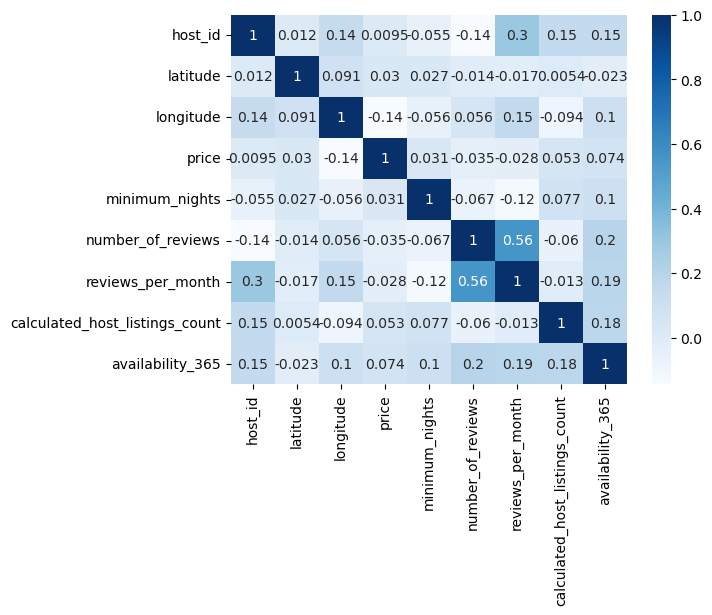

In [12]:
sns.heatmap(train_df.select_dtypes(include="number").drop(
    columns=["id"]).corr(), cmap="Blues", annot=True)
plt.show()

According to the heatmap, there are no highly correlated features in the dataset.

Intuitively, the number of reviews per month (the target) may be related with *the price*, *neighbourhood group*, and *room type*.
Below, plot these variables to see if there is any relationship between them.

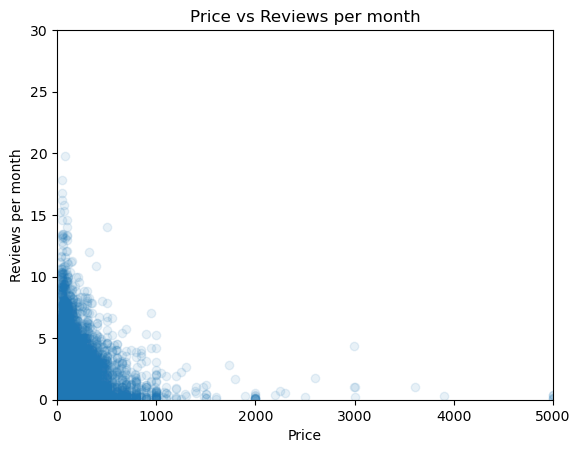

In [13]:
plt.plot(train_df["price"], train_df["reviews_per_month"], "o", alpha=0.1)
plt.axis([0, 5000, 0, 30])
plt.xlabel("Price")
plt.ylabel("Reviews per month")
plt.title("Price vs Reviews per month")
plt.show()

Text(0.5, 1.0, 'Reviews per month distribution')

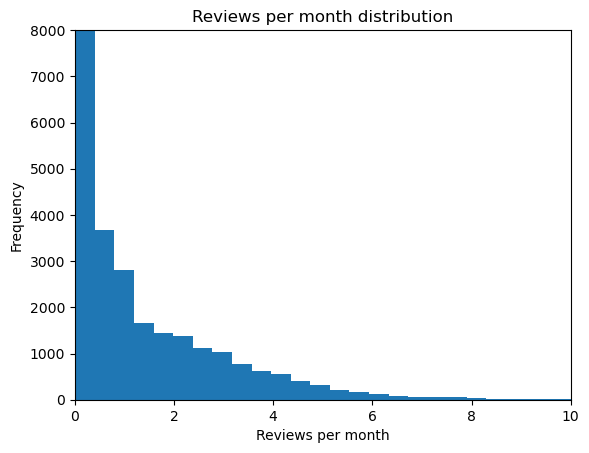

In [14]:
plt.hist(train_df["reviews_per_month"], bins=50)
plt.axis([0, 10, 0, 8000])
plt.xlabel("Reviews per month")
plt.ylabel("Frequency")
plt.title("Reviews per month distribution")

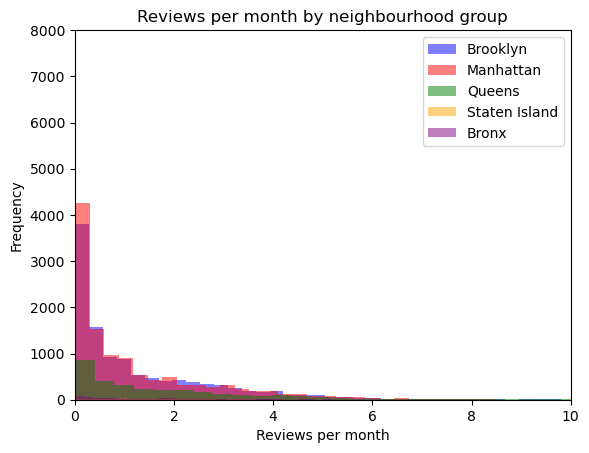

In [15]:
cmap = {
    "Manhattan": "red",
    "Brooklyn": "blue",
    "Queens": "green",
    "Staten Island": "orange",
    "Bronx": "purple"
}
for neighbour in train_df["neighbourhood_group"].unique():
    plt.hist(train_df[train_df["neighbourhood_group"] == neighbour]
             ["reviews_per_month"], bins=50, alpha=0.5, label=neighbour, color=cmap[neighbour])
plt.legend()
plt.xlabel("Reviews per month")
plt.ylabel("Frequency")
plt.title("Reviews per month by neighbourhood group")
plt.axis([0, 10, 0, 8000])
plt.show()

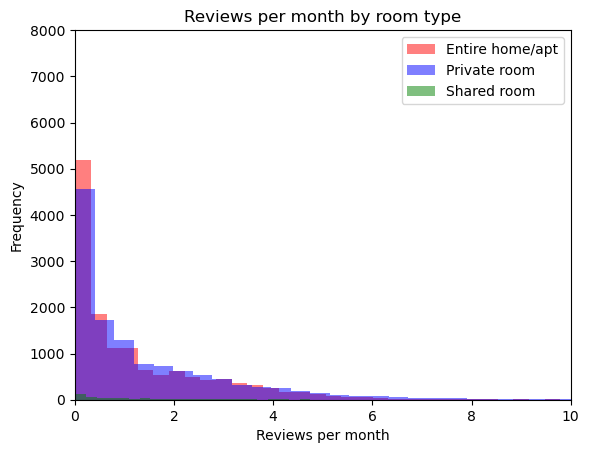

In [16]:
cmap = {
    "Entire home/apt": "red",
    "Private room": "blue",
    "Shared room": "green"
}
for room in train_df["room_type"].unique():
    plt.hist(train_df[train_df["room_type"] == room]["reviews_per_month"],
             bins=50, alpha=0.5, label=room, color=cmap[room])
plt.legend()
plt.xlabel("Reviews per month")
plt.ylabel("Frequency")
plt.title("Reviews per month by room type")
plt.axis([0, 10, 0, 8000])
plt.show()

# Preprocessing & Feature Engineering

## Diescretize the location information
Notice that the dataset contains location information in `latitude` and `longitude` in float format. Intuitively, the location of the listing may be related to the number of reviews per month. However, there's no need to be too specific about the location, so I'll discretize these two features into bins.

In [17]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import KBinsDiscretizer

location_cols = ["latitude", "longitude"]
location_discretizer = make_pipeline(
    SimpleImputer(strategy="mean"),
    StandardScaler(),
    KBinsDiscretizer(n_bins=10, encode="onehot")
)
location_discretizer

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('kbinsdiscretizer', KBinsDiscretizer(n_bins=10))])

- drop ids, time series data, and other irrelevant columns
- impute missing values 
- Scale numerical features 
- one-hot encode categorical features
- vectorize text data

In [18]:
target_col = ["reviews_per_month"]
drop_cols = ["host_name", "neighbourhood", "id", "host_id", "last_review"]
text_col = "name"
categorical_cols = ["room_type", "neighbourhood_group"]
num_cols = list(set(train_df.columns) - set(drop_cols) -
                set([text_col]) - set(categorical_cols) - set(location_cols) - set(target_col))

In [19]:
print("Drop columns:", drop_cols)
print("Text columns:", text_col)
print("Categorical columns:", categorical_cols)
print("Numerical columns:", num_cols)
print("Location columns:", location_cols)

assert set(drop_cols + [text_col] + categorical_cols +
           num_cols + location_cols) == set(X_train.columns)

Drop columns: ['host_name', 'neighbourhood', 'id', 'host_id', 'last_review']
Text columns: name
Categorical columns: ['room_type', 'neighbourhood_group']
Numerical columns: ['calculated_host_listings_count', 'price', 'minimum_nights', 'availability_365', 'number_of_reviews']
Location columns: ['latitude', 'longitude']


In [20]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import make_column_transformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder


# in order to combine SimpleImputer with CountVectorizer, we need to reshape the data since CountVectorizer expects 1D data while SimpleImputer requires 2D data
class DimensionTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.values.reshape(-1, 1)


class ReshapeTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.ravel()


preprocessor = make_column_transformer(
    ("drop", drop_cols),
    (make_pipeline(SimpleImputer(strategy="mean"), StandardScaler()), num_cols),
    (make_pipeline(SimpleImputer(strategy="constant",
     fill_value="missing"), OneHotEncoder(handle_unknown="ignore")), categorical_cols),
    (make_pipeline(
        DimensionTransformer(),
        SimpleImputer(strategy="constant", fill_value="missing"),
        ReshapeTransformer(),
        CountVectorizer()
    ), text_col),
    (location_discretizer, location_cols),
)
preprocessor

ColumnTransformer(transformers=[('drop', 'drop',
                                 ['host_name', 'neighbourhood', 'id', 'host_id',
                                  'last_review']),
                                ('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['calculated_host_listings_count', 'price',
                                  'minimum_nights', 'availability_365',
                                  'number_of_reviews']),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimp...
                                                  DimensionTransformer()),
                                                 ('simpleimputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('reshapetransformer',
                                                  ReshapeTransformer()),
                                                 ('countvectorizer',
                                                  CountVectorizer())]),
                                 'name'),
                                ('pipeline-4',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler()),
                                                 ('kbinsdiscretizer',
                                                  KBinsDiscretizer(n_bins=10))]),
                                 ['latitude', 'longitude'])])

In [21]:
preprocessor.fit(X_train)
new_cols = num_cols + preprocessor.named_transformers_["pipeline-2"].named_steps["onehotencoder"].get_feature_names_out().tolist() + preprocessor.named_transformers_[
    "pipeline-3"].named_steps["countvectorizer"].get_feature_names_out().tolist() + preprocessor.named_transformers_["pipeline-4"].named_steps["kbinsdiscretizer"].get_feature_names_out().tolist()
new_cols

['calculated_host_listings_count',
 'price',
 'minimum_nights',
 'availability_365',
 'number_of_reviews',
 'x0_Entire home/apt',
 'x0_Private room',
 'x0_Shared room',
 'x1_Bronx',
 'x1_Brooklyn',
 'x1_Manhattan',
 'x1_Queens',
 'x1_Staten Island',
 '00',
 '000',
 '000sf',
 '000sqft',
 '001',
 '001ll',
 '002',
 '003',
 '005',
 '01',
 '01401',
 '03',
 '0min',
 '10',
 '100',
 '1000',
 '1000sq',
 '1000sqf',
 '10017',
 '100mbps',
 '100th',
 '101',
 '102',
 '10222',
 '10223',
 '10248',
 '10250',
 '10253',
 '10257',
 '10262',
 '10263',
 '10268',
 '10273',
 '10288',
 '10292',
 '10294',
 '10296',
 '10298',
 '10299b',
 '10304',
 '10305',
 '10307',
 '103rd',
 '105',
 '105th',
 '107',
 '108th',
 '10ft',
 '10jfk',
 '10m',
 '10mi',
 '10million',
 '10min',
 '10minlga',
 '10mins',
 '10minto',
 '10mintolga',
 '10minute',
 '10mn',
 '10ppl',
 '10th',
 '11',
 '1100',
 '1100sf',
 '110th',
 '111',
 '111th',
 '11211',
 '11220',
 '113th',
 '116',
 '11a',
 '11th',
 '12',
 '1200',
 '1200sf',
 '1200sqft',
 '12

In [22]:
X_train_enc = pd.DataFrame(
    preprocessor.transform(X_train).todense(),
    columns=new_cols,
    index=X_train.index
)
X_train_enc

,calculated_host_listings_count,price,minimum_nights,availability_365,number_of_reviews,x0_Entire home/apt,x0_Private room,x0_Shared room,x1_Bronx,x1_Brooklyn,...,x1_0.0,x1_1.0,x1_2.0,x1_3.0,x1_4.0,x1_5.0,x1_6.0,x1_7.0,x1_8.0,x1_9.0
14989,-0.159553,-0.158355,-0.167357,-0.888903,-0.523857,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
40517,-0.159553,-0.086262,-0.225759,0.560038,-0.442048,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
32631,-0.159553,-0.278510,-0.108954,0.136146,-0.237527,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39464,-0.159553,-0.518819,0.241460,-0.850367,-0.544309,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
26165,-0.159553,0.274201,-0.225759,1.330752,0.212419,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8846,-0.159553,-0.326571,-0.225759,-0.488132,-0.401144,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
18555,-0.121042,0.178078,-0.225759,1.762351,1.439545,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21326,-0.005511,-0.470757,0.475070,1.276802,0.825982,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
33469,-0.159553,-0.422695,-0.284161,0.475260,-0.053458,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Pipeline & Model

In [23]:
res = pd.DataFrame(
    index=["mean_train_time", "mean_valid_time", "mean_train_err", "std_train_err", "mean_valid_err", "std_valid_err", ],)
# global random state
rand_state = 42

In [24]:
# function to store cross validation results into a df
def store_cross_val_results(cross_res, model_name, res_df):
    res_df[model_name] = [abs(cross_res["fit_time"].mean()), abs(cross_res["score_time"].mean(
    )), abs(cross_res["train_score"].mean()), cross_res["train_score"].std(), abs(cross_res["test_score"].mean()), cross_res["test_score"].std()]

In [25]:
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import cross_validate


baseline_mean_pipe = make_pipeline(
    preprocessor, DummyRegressor(strategy="mean"))
baseline_mean_pipe.fit(X_train, y_train)

baseline_median_pipe = make_pipeline(
    preprocessor, DummyRegressor(strategy="median"))
baseline_median_pipe.fit(X_train, y_train)

store_cross_val_results(cross_validate(baseline_mean_pipe, X_train, y_train,
                        scoring="neg_mean_absolute_percentage_error", return_train_score=True), "baseline_mean", res)
store_cross_val_results(cross_validate(baseline_median_pipe, X_train, y_train,
                        scoring="neg_mean_absolute_percentage_error", return_train_score=True), "baseline_median", res)

res.T

,mean_train_time,mean_valid_time,mean_train_err,std_train_err,mean_valid_err,std_valid_err
baseline_mean,0.107934,0.025505,6.700588,0.045580,6.700915,0.220391
baseline_median,0.101939,0.024943,3.477933,0.023838,3.479176,0.137455


- The linear model with default hyperparameters has a mean negative MAPE of $3.244967$, which is a little better than the baseline model, but not so much.
- After hyperparameter tuning, there is only a slight (negligible) improvement in the mean negative MAPE.
- The linear model does not seem to be overfitting, but the results are not very good.

In [26]:
from sklearn.linear_model import Ridge

# linear model with default parameters
linear_pipe_default = make_pipeline(
    preprocessor, Ridge(random_state=rand_state))

store_cross_val_results(cross_validate(linear_pipe_default, X_train, y_train,
                        scoring="neg_mean_absolute_percentage_error", return_train_score=True), "linear_default", res)

res.T

,mean_train_time,mean_valid_time,mean_train_err,std_train_err,mean_valid_err,std_valid_err
baseline_mean,0.107934,0.025505,6.700588,0.045580,6.700915,0.220391
baseline_median,0.101939,0.024943,3.477933,0.023838,3.479176,0.137455
linear_default,0.262096,0.024791,2.841766,0.016064,3.244956,0.109708


In [27]:
# linear model with hyperparameter tuning

from sklearn.model_selection import RandomizedSearchCV


linear_param_grid = {
    "ridge__alpha": np.logspace(-3, 3, 100)
}

linear_pipe = make_pipeline(preprocessor, Ridge(random_state=rand_state))
linear_param_search = RandomizedSearchCV(linear_pipe, param_distributions=linear_param_grid, n_iter=100,
                   scoring="neg_mean_absolute_percentage_error", n_jobs=-1, random_state=rand_state, return_train_score=True).fit(X_train, y_train)
pd.DataFrame(linear_param_search.cv_results_)[["param_ridge__alpha", "mean_test_score", "std_test_score", "mean_train_score", "std_train_score"]].sort_values("mean_test_score", ascending=False)

,param_ridge__alpha,mean_test_score,std_test_score,mean_train_score,std_train_score
50,1.072267,-3.244733,0.108662,-2.849754,0.015999
51,1.232847,-3.244794,0.106705,-2.866258,0.015946
49,0.932603,-3.245204,0.110708,-2.833922,0.016025
52,1.417474,-3.245486,0.104926,-2.882946,0.015870
53,1.629751,-3.246160,0.103562,-2.899892,0.015809
...,...,...,...,...,...
95,572.236766,-3.632986,0.121820,-3.600503,0.012893
96,657.933225,-3.654430,0.123091,-3.623596,0.012930
97,756.463328,-3.677172,0.124361,-3.647897,0.012999
98,869.749003,-3.701344,0.125637,-3.673478,0.013082


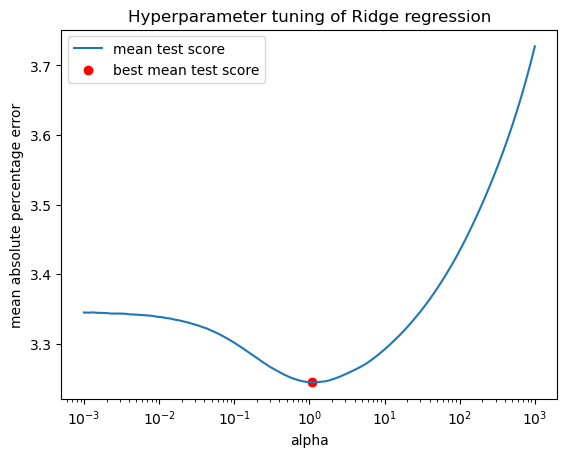

In [28]:
plt.semilogx(linear_param_search.param_distributions["ridge__alpha"], -linear_param_search.cv_results_[
             "mean_test_score"], label="mean test score")
plt.scatter(linear_param_search.best_params_["ridge__alpha"],
            -linear_param_search.best_score_, color="red", label="best mean test score")
plt.xlabel("alpha")
plt.ylabel("mean absolute percentage error")
plt.legend()
plt.title("Hyperparameter tuning of Ridge regression")
plt.show()

In [29]:
linear_pipe_tuned = make_pipeline(preprocessor, Ridge(alpha=linear_param_search.best_params_["ridge__alpha"], random_state=rand_state))
linear_pipe_tuned.fit(X_train, y_train)
store_cross_val_results(cross_validate(linear_pipe_tuned, X_train, y_train, return_train_score=True, scoring="neg_mean_absolute_percentage_error"), "linear_tuned", res)
res.T

,mean_train_time,mean_valid_time,mean_train_err,std_train_err,mean_valid_err,std_valid_err
baseline_mean,0.107934,0.025505,6.700588,0.045580,6.700915,0.220391
baseline_median,0.101939,0.024943,3.477933,0.023838,3.479176,0.137455
linear_default,0.262096,0.024791,2.841766,0.016064,3.244956,0.109708
linear_tuned,0.256973,0.023960,2.849868,0.016033,3.244741,0.108577


## <del>Linear model with feature cross</del> took so long (more than 10 min)

In [30]:
# from sklearn.preprocessing import PolynomialFeatures


# linear_pipe_cross = make_pipeline(preprocessor, PolynomialFeatures(degree=2), Ridge())
# linear_param_grid_cross = {
#     "ridge__alpha": np.logspace(-3, 3, 100),
# }

# linear_param_search_cross = RandomizedSearchCV(linear_pipe_cross, param_distributions=linear_param_grid_cross, n_iter=5,
#                    scoring="neg_mean_absolute_percentage_error", n_jobs=-1, random_state=rand_state, return_train_score=True).fit(X_train, y_train)
# pd.DataFrame(linear_param_search_cross.cv_results_)[["param_ridge__alpha", "param_polynomialfeatures__degree",
#                                                      "mean_test_score", "std_test_score", "mean_train_score", "std_train_score"]].sort_values("mean_test_score", ascending=False)

In [31]:
# store_cross_val_results(cross_validate(linear_param_search_cross.best_estimator_, X_train, y_train, return_train_score=True, scoring="neg_mean_absolute_percentage_error"), "linear_tuned_cross", res)
# res.T

Untuned model scores:
- Suprisingly, among the three models with default hyperparameters, the Decision Tree model has the best performance.
- But all three models are much better than the linear model.
- The Decision Tree model is overfitting, but the SVM RBF and XGBoost models are not.
- XGBoost is the fastest model to fit, and SVM RBF is the slowest. 

## Decision Tree

In [32]:
from sklearn.tree import DecisionTreeRegressor


dt_pipe_default = make_pipeline(preprocessor, DecisionTreeRegressor(random_state=rand_state))
dt_pipe_default.fit(X_train, y_train)
store_cross_val_results(cross_validate(dt_pipe_default, X_train, y_train, return_train_score=True, scoring="neg_mean_absolute_percentage_error"), "dt_default", res)
res.T

,mean_train_time,mean_valid_time,mean_train_err,std_train_err,mean_valid_err,std_valid_err
baseline_mean,0.107934,0.025505,6.700588,0.045580,6.700915,0.220391
baseline_median,0.101939,0.024943,3.477933,0.023838,3.479176,0.137455
linear_default,0.262096,0.024791,2.841766,0.016064,3.244956,0.109708
linear_tuned,0.256973,0.023960,2.849868,0.016033,3.244741,0.108577
dt_default,2.188106,0.025862,0.000027,0.000010,1.297476,0.029782


The decision tree model has a mean validation negative MAPE around $1.3$, which is much better than the linear model and the baseline model. Note that the training error is very close to zero, which is a cleaer sign of overfitting. Even with the overfitting, the decision tree model is much better than the linear model.

## SVM RBF for regression, this takes around 17 min to run on my machine

In [33]:
from sklearn.svm import SVR


svm_pipe_default = make_pipeline(preprocessor, SVR())
svm_pipe_default.fit(X_train, y_train)
store_cross_val_results(cross_validate(svm_pipe_default, X_train, y_train, return_train_score=True, scoring="neg_mean_absolute_percentage_error"), "svm_default", res)
res.T

,mean_train_time,mean_valid_time,mean_train_err,std_train_err,mean_valid_err,std_valid_err
baseline_mean,0.107934,0.025505,6.700588,0.045580,6.700915,0.220391
baseline_median,0.101939,0.024943,3.477933,0.023838,3.479176,0.137455
linear_default,0.262096,0.024791,2.841766,0.016064,3.244956,0.109708
linear_tuned,0.256973,0.023960,2.849868,0.016033,3.244741,0.108577
dt_default,2.188106,0.025862,0.000027,0.000010,1.297476,0.029782
svm_default,98.355877,5.572513,0.815512,0.005486,1.350237,0.033631


## XGBoost

In [34]:
from xgboost import XGBRegressor


xgb_pipe_default = make_pipeline(preprocessor, XGBRegressor(random_state=rand_state))
xgb_pipe_default.fit(X_train, y_train)
store_cross_val_results(cross_validate(xgb_pipe_default, X_train, y_train, return_train_score=True, scoring="neg_mean_absolute_percentage_error"), "xgb_default", res)
res.T

,mean_train_time,mean_valid_time,mean_train_err,std_train_err,mean_valid_err,std_valid_err
baseline_mean,0.107934,0.025505,6.700588,0.045580,6.700915,0.220391
baseline_median,0.101939,0.024943,3.477933,0.023838,3.479176,0.137455
linear_default,0.262096,0.024791,2.841766,0.016064,3.244956,0.109708
linear_tuned,0.256973,0.023960,2.849868,0.016033,3.244741,0.108577
dt_default,2.188106,0.025862,0.000027,0.000010,1.297476,0.029782
svm_default,98.355877,5.572513,0.815512,0.005486,1.350237,0.033631
xgb_default,0.458942,0.028451,1.248697,0.014761,1.379445,0.023309


# Feature Selection

After using `SelectFromModel` with the XGBRegressor model, the error is slightly decreased and the training and scoring times are decreased dramatically. 

In [35]:
from sklearn.feature_selection import SelectFromModel


model_selector = SelectFromModel(
    # DecisionTreeRegressor(random_state=rand_state),
    XGBRegressor(random_state=rand_state),
    max_features=50
)

selector_pipe = make_pipeline(preprocessor, model_selector)
selector_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('drop', 'drop',
                                                  ['host_name', 'neighbourhood',
                                                   'id', 'host_id',
                                                   'last_review']),
                                                 ('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['calculated_host_listings_count',
                                                   'price', 'minimum_nights',
                                                   'availability_365',
                                                   'number_of_reviews']),
                                                 ('pi...
                                                        importance_type=None,
                                                        interaction_constraints=None,
                                                        learning_rate=None,
                                                        max_bin=None,
                                                        max_cat_threshold=None,
                                                        max_cat_to_onehot=None,
                                                        max_delta_step=None,
                                                        max_depth=None,
                                                        max_leaves=None,
                                                        min_child_weight=None,
                                                        missing=nan,
                                                        monotone_constraints=None,
                                                        multi_strategy=None,
                                                        n_estimators=None,
                                                        n_jobs=None,
                                                        num_parallel_tree=None,
                                                        random_state=42, ...),
                                 max_features=50))])

In [36]:
selected_df = pd.DataFrame(
    data=selector_pipe.transform(X_train).todense(),
    columns=np.array(new_cols)[model_selector.get_support()],
)
selected_df

,minimum_nights,availability_365,number_of_reviews,x0_Entire home/apt,x0_Private room,15,15mins,25,action,airport,...,single,square,sumptin,time,to,x0_1.0,x0_6.0,x0_7.0,x1_0.0,x1_9.0
0,-0.167357,-0.888903,-0.523857,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.225759,0.560038,-0.442048,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.108954,0.136146,-0.237527,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.241460,-0.850367,-0.544309,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.225759,1.330752,0.212419,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27185,-0.225759,-0.488132,-0.401144,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27186,-0.225759,1.762351,1.439545,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27187,0.475070,1.276802,0.825982,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
27188,-0.284161,0.475260,-0.053458,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [37]:
pd.DataFrame(X_train_enc.columns[selector_pipe.named_steps["selectfrommodel"].get_support()]).T

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,minimum_nights,availability_365,number_of_reviews,x0_Entire home/apt,x0_Private room,15,15mins,25,action,airport,...,single,square,sumptin,time,to,x0_1.0,x0_6.0,x0_7.0,x1_0.0,x1_9.0


## Test the feature selection and see if it improves the model performance

In [38]:
store_cross_val_results(cross_validate(DecisionTreeRegressor(random_state=rand_state), selected_df, y_train, return_train_score=True, scoring="neg_mean_absolute_percentage_error"), "dt_feat_selection", res)
store_cross_val_results(cross_validate(Ridge(random_state=rand_state), selected_df, y_train, return_train_score=True, scoring="neg_mean_absolute_percentage_error"), "linear_feat_selection", res)
store_cross_val_results(cross_validate(XGBRegressor(random_state=rand_state), selected_df, y_train, return_train_score=True, scoring="neg_mean_absolute_percentage_error"), "xgb_feat_selection", res)

res.T

,mean_train_time,mean_valid_time,mean_train_err,std_train_err,mean_valid_err,std_valid_err
baseline_mean,0.107934,0.025505,6.700588,0.045580,6.700915,0.220391
baseline_median,0.101939,0.024943,3.477933,0.023838,3.479176,0.137455
linear_default,0.262096,0.024791,2.841766,0.016064,3.244956,0.109708
linear_tuned,0.256973,0.023960,2.849868,0.016033,3.244741,0.108577
dt_default,2.188106,0.025862,0.000027,0.000010,1.297476,0.029782
svm_default,98.355877,5.572513,0.815512,0.005486,1.350237,0.033631
xgb_default,0.458942,0.028451,1.248697,0.014761,1.379445,0.023309
dt_feat_selection,0.082162,0.002428,0.239273,0.004806,1.515336,0.039886
linear_feat_selection,0.005226,0.001531,3.666143,0.018308,3.684712,0.140526
xgb_feat_selection,0.278719,0.007574,1.207690,0.010604,1.351311,0.019043


# Hyperparameter Tuning

## Decision Tree Tuning

In [39]:
dt_param_grid = {
    "decisiontreeregressor__max_depth": np.arange(1, 11),
    "decisiontreeregressor__min_samples_split": np.arange(2, 11),
    "decisiontreeregressor__min_samples_leaf": np.arange(1, 11)
}

# dt_pipe = make_pipeline(preprocessor, DecisionTreeRegressor(random_state=rand_state))
dt_pipe = make_pipeline(DecisionTreeRegressor(random_state=rand_state))
dt_param_search = RandomizedSearchCV(dt_pipe, param_distributions=dt_param_grid, n_iter=50,  # reduce n_iter a bit to speed up
                                     scoring="neg_mean_absolute_percentage_error", n_jobs=-1, random_state=rand_state, return_train_score=True).fit(selected_df, y_train)
pd.DataFrame(dt_param_search.cv_results_)[["param_decisiontreeregressor__max_depth", "param_decisiontreeregressor__min_samples_split", "param_decisiontreeregressor__min_samples_leaf",
                                           "mean_test_score", "std_test_score", "mean_train_score", "std_train_score"]].sort_values("mean_test_score", ascending=False).head()

,param_decisiontreeregressor__max_depth,param_decisiontreeregressor__min_samples_split,param_decisiontreeregressor__min_samples_leaf,mean_test_score,std_test_score,mean_train_score,std_train_score
49,10,6,3,-1.384634,0.019888,-1.280550,0.003801
27,10,2,4,-1.385748,0.019458,-1.283579,0.004422
1,10,10,2,-1.388069,0.020146,-1.284691,0.003618
43,9,8,3,-1.388196,0.018045,-1.326202,0.003823
12,9,2,10,-1.388635,0.016049,-1.336909,0.005716


In [40]:
dt_pipe_tuned = make_pipeline(DecisionTreeRegressor(max_depth=dt_param_search.best_params_["decisiontreeregressor__max_depth"], min_samples_split=dt_param_search.best_params_[
                              "decisiontreeregressor__min_samples_split"], min_samples_leaf=dt_param_search.best_params_["decisiontreeregressor__min_samples_leaf"], random_state=rand_state))
dt_pipe_tuned.fit(selected_df, y_train)
store_cross_val_results(cross_validate(dt_pipe_tuned, selected_df, y_train, return_train_score=True, scoring="neg_mean_absolute_percentage_error"), "dt_tuned", res)
res.T

,mean_train_time,mean_valid_time,mean_train_err,std_train_err,mean_valid_err,std_valid_err
baseline_mean,0.107934,0.025505,6.700588,0.045580,6.700915,0.220391
baseline_median,0.101939,0.024943,3.477933,0.023838,3.479176,0.137455
linear_default,0.262096,0.024791,2.841766,0.016064,3.244956,0.109708
linear_tuned,0.256973,0.023960,2.849868,0.016033,3.244741,0.108577
dt_default,2.188106,0.025862,0.000027,0.000010,1.297476,0.029782
svm_default,98.355877,5.572513,0.815512,0.005486,1.350237,0.033631
xgb_default,0.458942,0.028451,1.248697,0.014761,1.379445,0.023309
dt_feat_selection,0.082162,0.002428,0.239273,0.004806,1.515336,0.039886
linear_feat_selection,0.005226,0.001531,3.666143,0.018308,3.684712,0.140526
xgb_feat_selection,0.278719,0.007574,1.207690,0.010604,1.351311,0.019043


The tuned decision tree model is not overfitting anymore, but the mean validation negative MAPE is still around $1.3$, which does not improve the model.

## SVM RBF Tuning

In [41]:
from sklearn.svm import SVR


svm_param_grid = {
    "svr__C": np.logspace(-3, 3, 7),
    "svr__gamma": np.logspace(-3, 3, 7)
}

svm_pipe = make_pipeline(SVR())
svm_param_search = RandomizedSearchCV(svm_pipe, param_distributions=svm_param_grid, n_iter=5, # this takes so long, have to reduce n_iter and cv to a very small number
                   scoring="neg_mean_absolute_percentage_error", n_jobs=-1, random_state=rand_state, return_train_score=True, cv=3).fit(selected_df, y_train)

pd.DataFrame(svm_param_search.cv_results_)[["param_svr__C", "param_svr__gamma", "mean_test_score", "std_test_score", "mean_train_score", "std_train_score"]].sort_values("mean_test_score", ascending=False).head()

/opt/miniconda3/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


,param_svr__C,param_svr__gamma,mean_test_score,std_test_score,mean_train_score,std_train_score
3,1000.00,0.1,-1.403051,0.038452,-0.951225,0.013491
4,0.10,1.0,-1.510652,0.033151,-1.417543,0.008904
1,1000.00,1.0,-1.960675,0.070898,-0.818992,0.016214
0,0.01,1000.0,-2.933367,0.145074,-2.882126,0.024481
2,1000.00,100.0,-3.277220,0.076829,-0.537971,0.004054


In [42]:
svm_pipe_tuned = make_pipeline(SVR(C=svm_param_search.best_params_["svr__C"], gamma=svm_param_search.best_params_["svr__gamma"]))
svm_pipe_tuned.fit(selected_df, y_train)
store_cross_val_results(cross_validate(svm_pipe_tuned, selected_df, y_train, return_train_score=True, scoring="neg_mean_absolute_percentage_error"), "svm_tuned", res)
res.T

,mean_train_time,mean_valid_time,mean_train_err,std_train_err,mean_valid_err,std_valid_err
baseline_mean,0.107934,0.025505,6.700588,0.045580,6.700915,0.220391
baseline_median,0.101939,0.024943,3.477933,0.023838,3.479176,0.137455
linear_default,0.262096,0.024791,2.841766,0.016064,3.244956,0.109708
linear_tuned,0.256973,0.023960,2.849868,0.016033,3.244741,0.108577
dt_default,2.188106,0.025862,0.000027,0.000010,1.297476,0.029782
svm_default,98.355877,5.572513,0.815512,0.005486,1.350237,0.033631
xgb_default,0.458942,0.028451,1.248697,0.014761,1.379445,0.023309
dt_feat_selection,0.082162,0.002428,0.239273,0.004806,1.515336,0.039886
linear_feat_selection,0.005226,0.001531,3.666143,0.018308,3.684712,0.140526
xgb_feat_selection,0.278719,0.007574,1.207690,0.010604,1.351311,0.019043


## XGBoost Tuning

In [43]:
xgb_param_grid = {
    "xgbregressor__max_depth": np.arange(1, 11),
    "xgbregressor__learning_rate": np.logspace(-3, 0, 4),
    "xgbregressor__n_estimators": np.arange(100, 1001, 100),
    "xgbregressor__gamma": np.arange(0, 6),
}

xgb_pipe = make_pipeline(XGBRegressor(random_state=rand_state))
xgb_param_search = RandomizedSearchCV(xgb_pipe, param_distributions=xgb_param_grid, n_iter=50, # reduce n_iter a bit to speed up
                   scoring="neg_mean_absolute_percentage_error", n_jobs=-1, random_state=rand_state, return_train_score=True).fit(selected_df, y_train)
pd.DataFrame(xgb_param_search.cv_results_)[["param_xgbregressor__max_depth", "param_xgbregressor__learning_rate", "param_xgbregressor__n_estimators", "param_xgbregressor__gamma", "mean_test_score", "std_test_score", "mean_train_score", "std_train_score"]].sort_values("mean_test_score", ascending=False).head()

,param_xgbregressor__max_depth,param_xgbregressor__learning_rate,param_xgbregressor__n_estimators,param_xgbregressor__gamma,mean_test_score,std_test_score,mean_train_score,std_train_score
16,8,0.01,1000,0,-1.348117,0.013969,-1.216006,0.006899
22,3,0.10,600,2,-1.375889,0.020844,-1.348874,0.009410
1,8,1.00,900,4,-1.378237,0.061938,-1.330598,0.039978
17,3,0.10,600,4,-1.383455,0.021757,-1.362495,0.007048
12,10,1.00,900,2,-1.396934,0.027050,-1.274724,0.041115


In [44]:
xgb_pipe_tuned = make_pipeline(XGBRegressor(max_depth=xgb_param_search.best_params_["xgbregressor__max_depth"], learning_rate=xgb_param_search.best_params_[
                               "xgbregressor__learning_rate"], n_estimators=xgb_param_search.best_params_["xgbregressor__n_estimators"], gamma=xgb_param_search.best_params_["xgbregressor__gamma"], random_state=rand_state))
xgb_pipe_tuned.fit(selected_df, y_train)
store_cross_val_results(cross_validate(xgb_pipe_tuned, selected_df, y_train, return_train_score=True, scoring="neg_mean_absolute_percentage_error"), "xgb_tuned", res)
res.T

,mean_train_time,mean_valid_time,mean_train_err,std_train_err,mean_valid_err,std_valid_err
baseline_mean,0.107934,0.025505,6.700588,0.045580,6.700915,0.220391
baseline_median,0.101939,0.024943,3.477933,0.023838,3.479176,0.137455
linear_default,0.262096,0.024791,2.841766,0.016064,3.244956,0.109708
linear_tuned,0.256973,0.023960,2.849868,0.016033,3.244741,0.108577
dt_default,2.188106,0.025862,0.000027,0.000010,1.297476,0.029782
svm_default,98.355877,5.572513,0.815512,0.005486,1.350237,0.033631
xgb_default,0.458942,0.028451,1.248697,0.014761,1.379445,0.023309
dt_feat_selection,0.082162,0.002428,0.239273,0.004806,1.515336,0.039886
linear_feat_selection,0.005226,0.001531,3.666143,0.018308,3.684712,0.140526
xgb_feat_selection,0.278719,0.007574,1.207690,0.010604,1.351311,0.019043


# Interpretation

## Interprete the XGBoost model

In [45]:
xgb_feat_importance = pd.Series(xgb_pipe_tuned.named_steps["xgbregressor"].feature_importances_, index=selected_df.columns).sort_values(ascending=False)

xgb_feat_importance

number_of_reviews     0.122287
jfk                   0.068336
minimum_nights        0.055080
lga                   0.046268
x1_9.0                0.030547
outside               0.030063
day                   0.029069
action                0.027834
like                  0.026328
is                    0.024405
availability_365      0.024090
midtown1stop          0.022442
common                0.021979
better                0.021950
airport               0.020437
comfortably           0.020361
empire                0.020223
basic                 0.020044
x0_7.0                0.019168
loft                  0.016693
nice                  0.015730
single                0.015508
from                  0.015217
midtown               0.015012
time                  0.014636
square                0.014503
blue                  0.014312
can                   0.014045
casa                  0.013328
hot                   0.012931
x0_Entire home/apt    0.012550
x0_Private room       0.012436
sumptin 

From the built-in feature importance values, the most important features are `number_of_reviews`, `jfk`, `minimum_nights`, and `lga`.   
It makes sense that the number of reviews is the most important feature, as it is directly related to the target variable.    
`jfk` and `lga` are features generated by the `CountVectorizer` from the listings' names. They are the codes for the airports in New York City. Usually these two codes are included in the listings' names when the listings are close to the airports, therefore it makes sense that these features are important.

Using SHAP, investigate the prediction of the first instance in the test set. 

In [46]:
import shap


shap.initjs()

In [47]:
test_instance = X_test.iloc[0:1]
test_instance

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,calculated_host_listings_count,availability_365
17247,13642568,Luxe & Spacious Williamsburg Studio,79167228,Nate,Brooklyn,Williamsburg,40.71666,-73.95447,Entire home/apt,105,5,11,2018-08-06,1,0


In [48]:
y_test.iloc[0]

0.3

In [49]:
selector_pipe.fit(X_train, y_train)
test_instance_enc = selector_pipe.transform(test_instance)
test_instance_enc = pd.DataFrame(test_instance_enc.todense(), columns=np.array(new_cols)[model_selector.get_support()])
test_instance_enc

,minimum_nights,availability_365,number_of_reviews,x0_Entire home/apt,x0_Private room,15,15mins,25,action,airport,...,single,square,sumptin,time,to,x0_1.0,x0_6.0,x0_7.0,x1_0.0,x1_9.0
0,-0.050552,-0.888903,-0.380692,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
explainer = shap.TreeExplainer(xgb_pipe_tuned.named_steps["xgbregressor"])
shap_values = explainer(test_instance_enc)
pd.DataFrame(shap_values.values, columns=test_instance_enc.columns)

,minimum_nights,availability_365,number_of_reviews,x0_Entire home/apt,x0_Private room,15,15mins,25,action,airport,...,single,square,sumptin,time,to,x0_1.0,x0_6.0,x0_7.0,x1_0.0,x1_9.0
0,-0.238714,-0.410775,-0.268971,0.018397,-0.000876,-0.002049,0.000146,-0.000179,-0.000195,-0.000681,...,-0.000633,-0.003654,-0.00021,-0.000902,-0.008762,-0.000714,-0.00376,-0.010727,-0.000365,-0.017206


In [51]:
(shap_values.base_values, shap_values.values.sum(1), shap_values.values.sum(1) + shap_values.base_values)

(array([1.3651966], dtype=float32),
 array([-0.9596238], dtype=float32),
 array([0.40557277], dtype=float32))

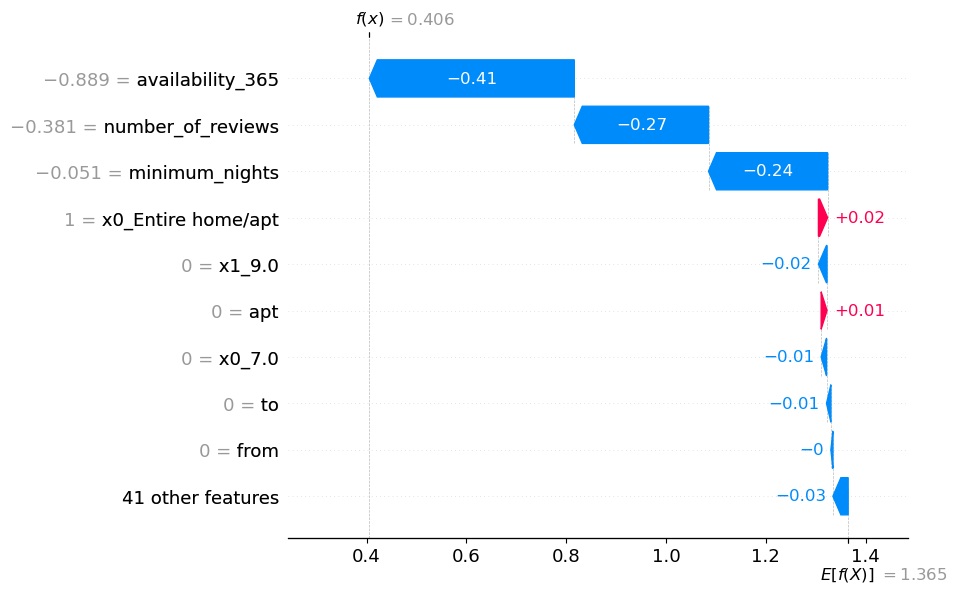

In [52]:
shap.plots.waterfall(shap_values[0])

From the plot, we can see that the base value is $1.365104.$, and the prediction is $0.39855254$.  
There are three features that contribute the most to the prediction: `availability_365, `number_of_reviews`, and `minimum_nights`.  
The `availability_365` feature has the most negative impact on the prediction that pulls the prediction down by $0.41a$.   
Overall, the plot makes sense and aligns with our intuition and the feature importance values.

# Comparison & Model Evaluation

The model with the highest validation score is the decision tree model with default hyperparameters.   
However, that one's highly overfitting, so I'll also include the model withe the second highest validation score, the XGBoost model with tuned hyperparameters and feature selection.

In [53]:
dt_default = dt_pipe_default.named_steps["decisiontreeregressor"]
dt_tuned = dt_pipe_tuned.named_steps["decisiontreeregressor"]
xgb_tuned = xgb_pipe_tuned.named_steps["xgbregressor"]
linear_tuned = linear_pipe_tuned.named_steps["ridge"]
svm_tuned = svm_pipe_tuned.named_steps["svr"]

In [54]:
dt_default_pipe = make_pipeline(preprocessor, dt_default)
dt_tuned_pipe = make_pipeline(selector_pipe, dt_tuned)
xgb_tuned_pipe = make_pipeline(selector_pipe, xgb_tuned)
linear_tuned_pipe = make_pipeline(selector_pipe, linear_tuned)
svm_tuned_pipe = make_pipeline(selector_pipe, svm_pipe_tuned)

In [55]:
pipes = [dt_default_pipe, dt_tuned_pipe, xgb_tuned_pipe, linear_tuned_pipe, svm_tuned_pipe]

In [56]:
for pipe in pipes:
    pipe.fit(X_train, y_train)

In [57]:
test_scores = {}
pipe_names = ["dt_default", "dt_tuned", "xgb_tuned", "linear_tuned", "svm_tuned"]
for name, pipe in zip(pipe_names, pipes):
    # test_scores[name] = pipe.score(X_test, y_test, scoring="neg_mean_absolute_percentage_error")
    # calculate the mean absolute percentage error 
    test_scores[name] = np.mean(np.abs(pipe.predict(X_test) - y_test) / y_test)

In [58]:
pd.DataFrame(test_scores, index=["test_score"]).T

,test_score
dt_default,1.285342
dt_tuned,1.375300
xgb_tuned,1.341981
linear_tuned,3.772976
svm_tuned,1.333140


The test errors are close to the validation errors, so it is trustworthy.

# Assessment on Test Set

Here's the validation scores for the models I tried:

In [59]:
res.T

,mean_train_time,mean_valid_time,mean_train_err,std_train_err,mean_valid_err,std_valid_err
baseline_mean,0.107934,0.025505,6.700588,0.045580,6.700915,0.220391
baseline_median,0.101939,0.024943,3.477933,0.023838,3.479176,0.137455
linear_default,0.262096,0.024791,2.841766,0.016064,3.244956,0.109708
linear_tuned,0.256973,0.023960,2.849868,0.016033,3.244741,0.108577
dt_default,2.188106,0.025862,0.000027,0.000010,1.297476,0.029782
svm_default,98.355877,5.572513,0.815512,0.005486,1.350237,0.033631
xgb_default,0.458942,0.028451,1.248697,0.014761,1.379445,0.023309
dt_feat_selection,0.082162,0.002428,0.239273,0.004806,1.515336,0.039886
linear_feat_selection,0.005226,0.001531,3.666143,0.018308,3.684712,0.140526
xgb_feat_selection,0.278719,0.007574,1.207690,0.010604,1.351311,0.019043


Here's the test scores for the models I tried:

In [60]:
pd.DataFrame(test_scores, index=["test_score"]).T

,test_score
dt_default,1.285342
dt_tuned,1.375300
xgb_tuned,1.341981
linear_tuned,3.772976
svm_tuned,1.333140


Among all models, the SVM RBF model has the best performance on the test set, and the linear model has the worst performance (much worse than others).   
The validation scores are close to the test scores, so the models are trustworthy.   
Possible improvements:   
    - Do feature cross to help enhance the linear model.  
    - Hyperparameter tuning for feature selection `n_features_to_select`.   
    - Use more advanced feature selection methods, I cannot do that cause it takes too long to run (over 20 min).   
    - More comprehensive hyperparameter tuning for the XGBoost model.

In [73]:
res_df = pd.DataFrame(y_test);
res_df["predictions"] = xgb_tuned_pipe.predict(X_test)
res_df["error"] = np.abs(res_df["reviews_per_month"] - res_df["predictions"])
res_df

,reviews_per_month,predictions,error
17247,0.30,0.405805,0.105805
9782,0.02,0.099553,0.079553
593,0.21,0.629090,0.419090
33216,1.81,0.764531,1.045469
460,0.79,1.199186,0.409186
...,...,...,...
41299,2.38,1.873738,0.506262
15107,0.51,0.865024,0.355024
30586,1.03,2.501960,1.471960
16034,0.08,0.180703,0.100703


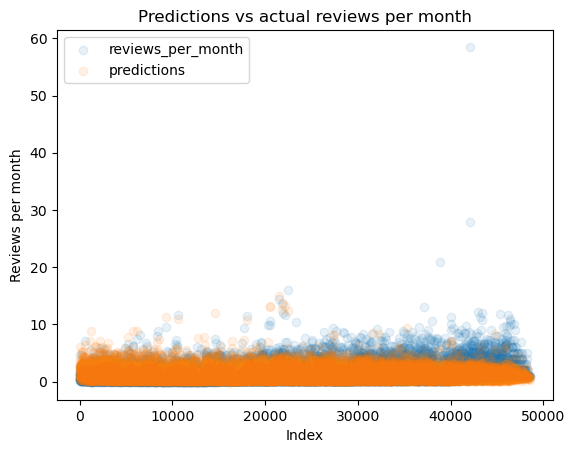

In [79]:
# plot: scatter plot, x = index, y = reviews_per_month, predictions, two colors
plt.scatter(res_df.index, res_df["reviews_per_month"], label="reviews_per_month", alpha=0.1)
plt.scatter(res_df.index, res_df["predictions"], label="predictions", alpha=0.1)
plt.xlabel("Index")
plt.ylabel("Reviews per month")
plt.legend()
plt.title("Predictions vs actual reviews per month")
plt.show()